# 관광 데이터 EDA
----------------
* 해당 데이터는 Image와 Text(overview)를 인풋으로 넣어 분류하는 task이다
* Image 데이터, Text 데이터를 분석하고자한다.
* Text는 어떤 형태소가 주로 존재하는지 확인한다.


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use("seaborn")
sns.set(font_scale=2.5)

# 색 설정
colors = sns.color_palette("muted",10)

import cv2

# 문자 토큰화 라이브러리
import spacy
import nltk
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

C:\Users\younho\AppData\Local\Temp\ipykernel_42916\1399308459.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


In [2]:
df_train = pd.read_csv("tourism/train.csv")
df_test = pd.read_csv("tourism/test.csv")

df_train.head()
#df_test.head()

,id,img_path,overview,cat1,cat2,cat3
0,TRAIN_00000,./image/train/TRAIN_00000.jpg,소안항은 조용한 섬으로 인근해안이 청정해역으로 일찍이 김 양식을 해서 높은 소득을 ...,자연,자연관광지,항구/포구
1,TRAIN_00001,./image/train/TRAIN_00001.jpg,경기도 이천시 모가면에 있는 골프장으로 대중제 18홀이다. 회원제로 개장을 했다가 ...,레포츠,육상 레포츠,골프
2,TRAIN_00002,./image/train/TRAIN_00002.jpg,금오산성숯불갈비는 한우고기만을 전문적으로 취급하고 사용하는 부식 자재 또한 유기농법...,음식,음식점,한식
3,TRAIN_00003,./image/train/TRAIN_00003.jpg,철판 위에서 요리하는 안동찜닭을 맛볼 수 있는 곳이다. 경상북도 안동시에 있는 한식...,음식,음식점,한식
4,TRAIN_00004,./image/train/TRAIN_00004.jpg,※ 영업시간 10:30 ~ 20:30\n\n3대에 걸쳐 아귀만을 전문으로 취급하는 ...,음식,음식점,한식


# 한국어 폰트 설정
-----------
*   폰트 설치 후 matplotlib에 설치해준다

In [3]:
plt.rc("font", family="NanumGothic")

# Label
-------------
*   라벨이 어떻게 구성이 되었는지 먼저 확인해본다.
*   라벨의 분포는 어떻게 되어있고, cat1,cat2,cat3 간의 상관도도 파악해보자

<AxesSubplot: >

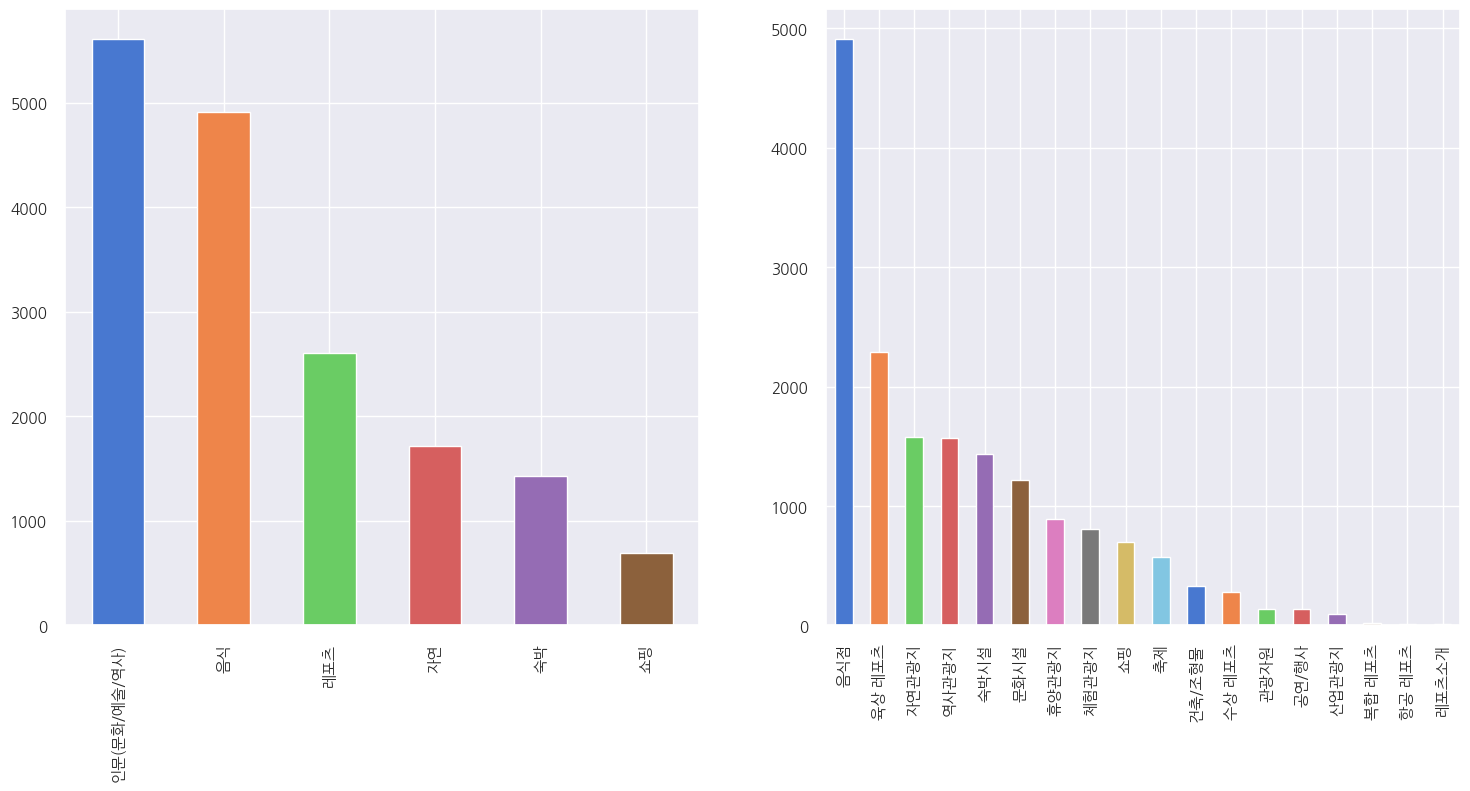

In [44]:
f, ax = plt.subplots(1,2,figsize=(18,8))

sns.set(font='NanumGothic', font_scale=1.5)
df_train['cat1'].value_counts().plot.bar(ax=ax[0], color= colors)
df_train['cat2'].value_counts().plot.bar(ax=ax[1], color=colors)


<AxesSubplot: >

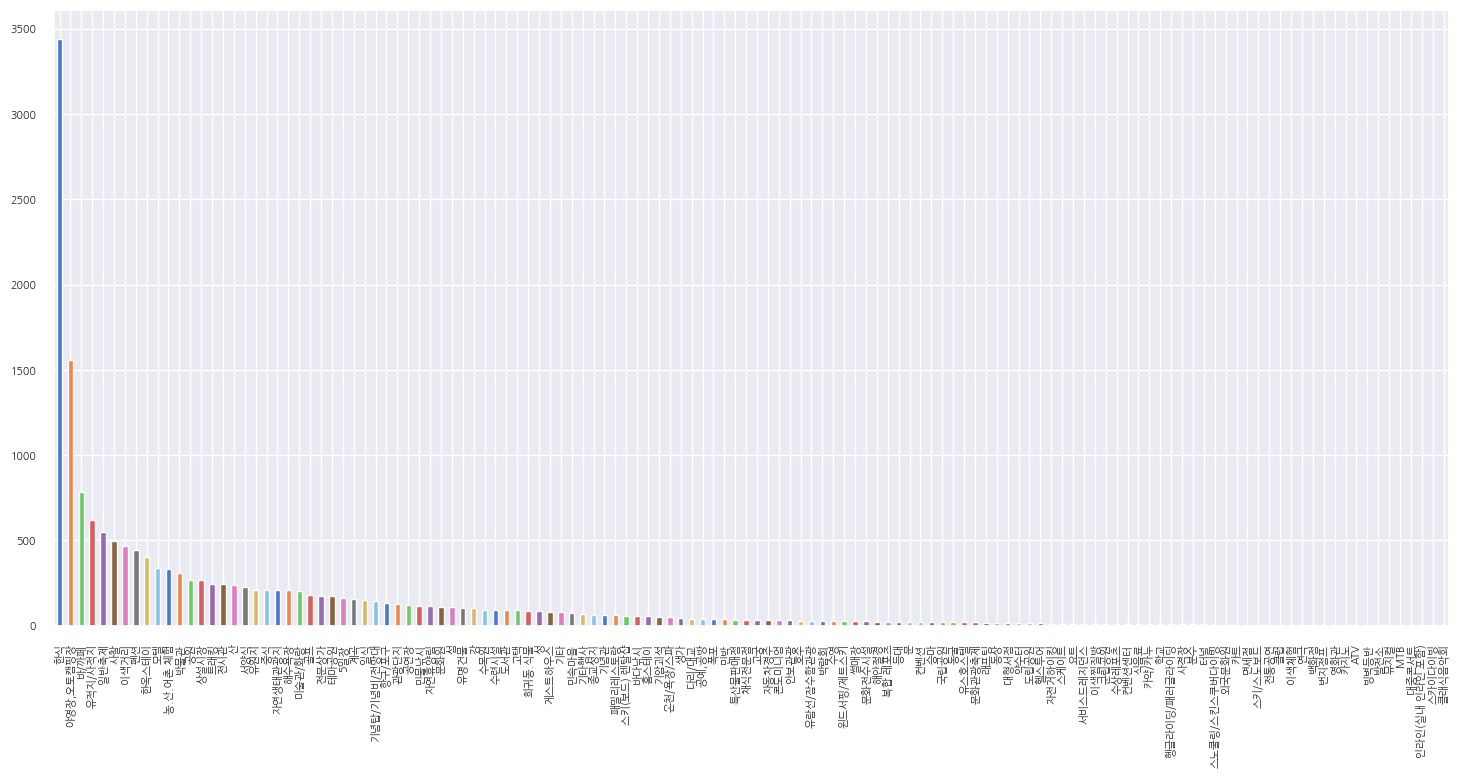

In [46]:
# cat3의 경우 굉장히 class가 많기 때문에 좀 넓게 잡았다.
plt.figure(figsize=(18,8))
sns.set(font='NanumGothic', font_scale=0.7)
df_train['cat3'].value_counts().plot.bar(color=colors)


<AxesSubplot: ylabel='cat2'>

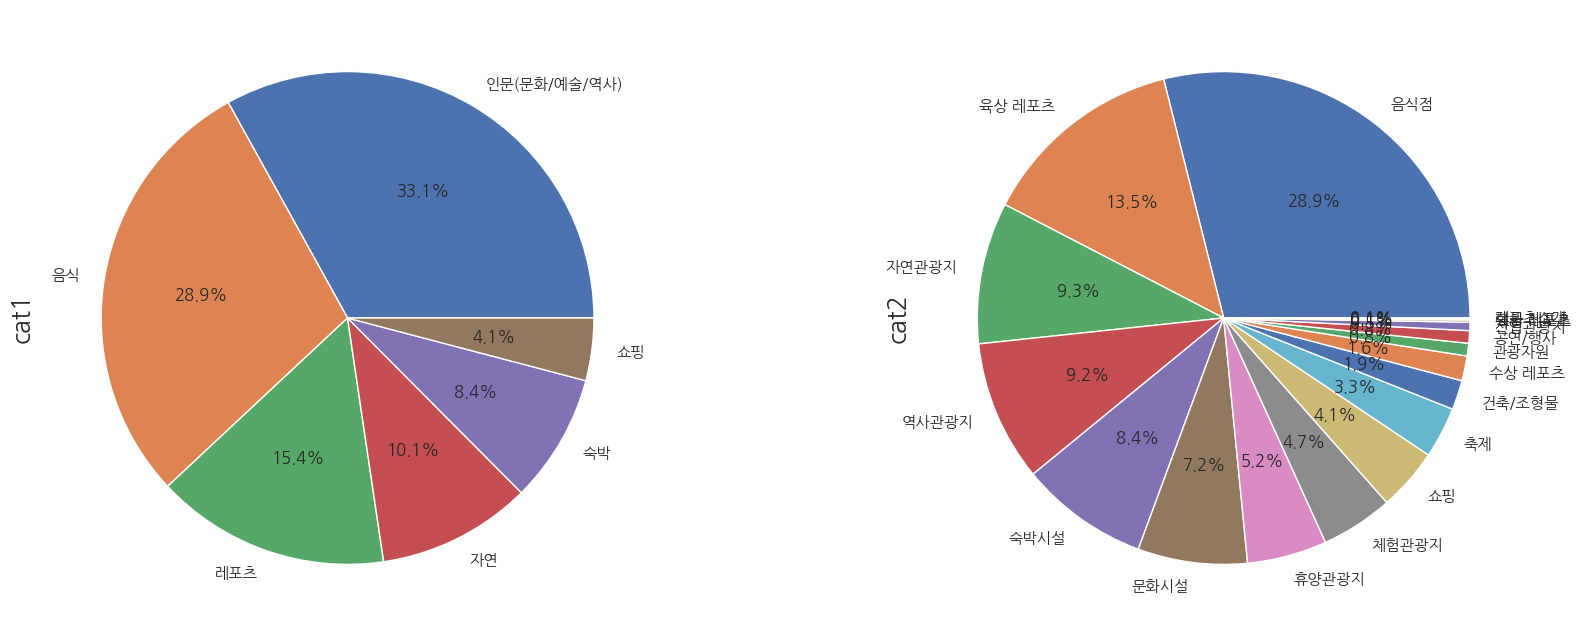

In [34]:
f, ax = plt.subplots(1,2,figsize=(20,8))


# subplot끼리의 margin을 조절해주는 변수
# 대부분 인문/음식쪽이 많은 label을 차지하는 것으로 보인다.
# 개별 category로는 
plt.subplots_adjust(wspace=0.3, hspace=0.3)
sns.set(font_scale=1., font="NanumGothic")
df_train['cat1'].value_counts().plot.pie(ax=ax[0], autopct="%1.1f%%")
df_train['cat2'].value_counts().plot.pie(ax=ax[1], autopct="%1.1f%%")


<AxesSubplot: ylabel='cat3'>

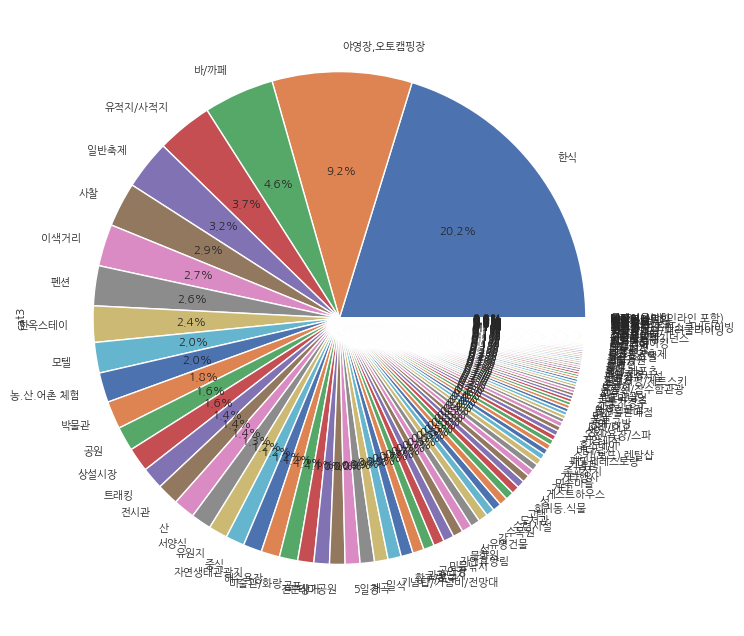

In [47]:
# 한식이 가장 많으며 한식 ~ 펜션까지가 50%이상을 차지 하는 결과를 보여준다.
plt.figure(figsize=(18,8))
sns.set(font='NanumGothic', font_scale=0.7)
df_train['cat3'].value_counts().plot.pie(autopct="%1.1f%%")


# Cat2와 Cat3의 관계 파악
*   주된 class인 "음식", "육상 스포츠", "자연관광지"에 대해 데이터 분석을 해보자 한다.
*   음식점의 경우 한식점이 70%이상을 차지하고 있고, 바/카페가 다음이다.
*   캠핑장, 골프, 트래킹, 수련시설이 운동 시설의 90%를 차지하고 있다.
*   자연관광지는 상당히 class간의 균형이 잘 맞는다.


Text(0.5, 1.0, '음식점의 종류 분포')

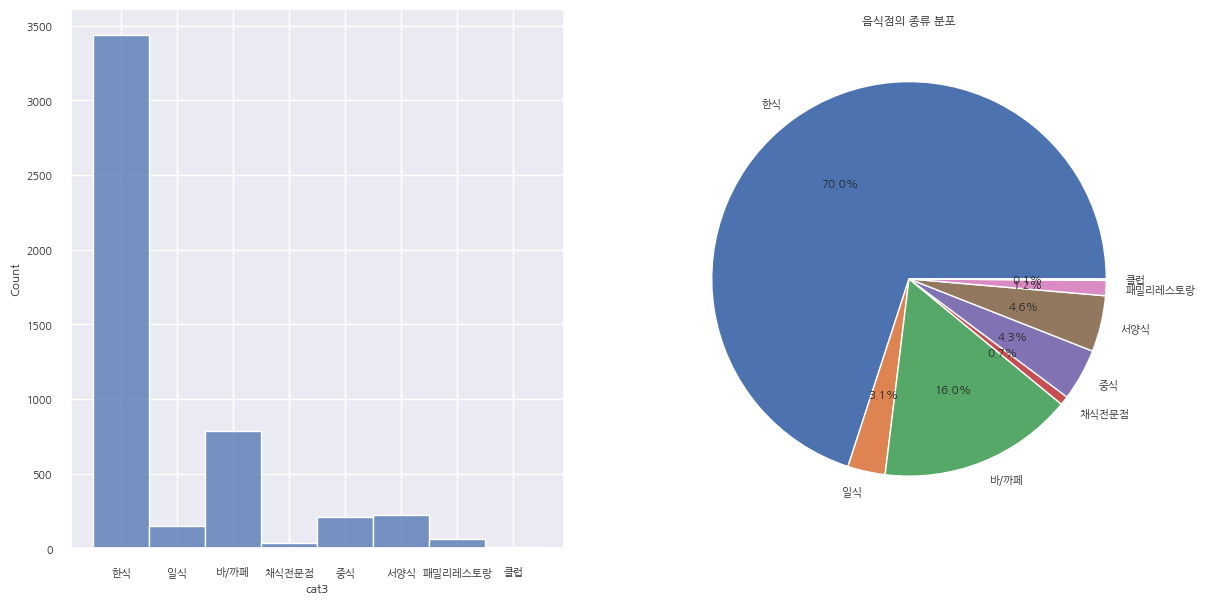

In [105]:
from collections import defaultdict
_, ax = plt.subplots(1,2,figsize=(14,7))
idx = df_train["cat2"] == "음식점"
sns.histplot(df_train[idx]["cat3"], ax=ax[0])

cat3_set = set(df_train[idx]["cat3"])
cat3_count = defaultdict(int)

for d in df_train[idx]["cat3"]:
    if d in cat3_set:
        cat3_count[d] += 1

_ = ax[1].pie(cat3_count.values(), labels=cat3_count.keys(), autopct="%1.1f%%")
plt.title("음식점의 종류 분포")

Text(0.5, 1.0, '운동의 종류 분포')

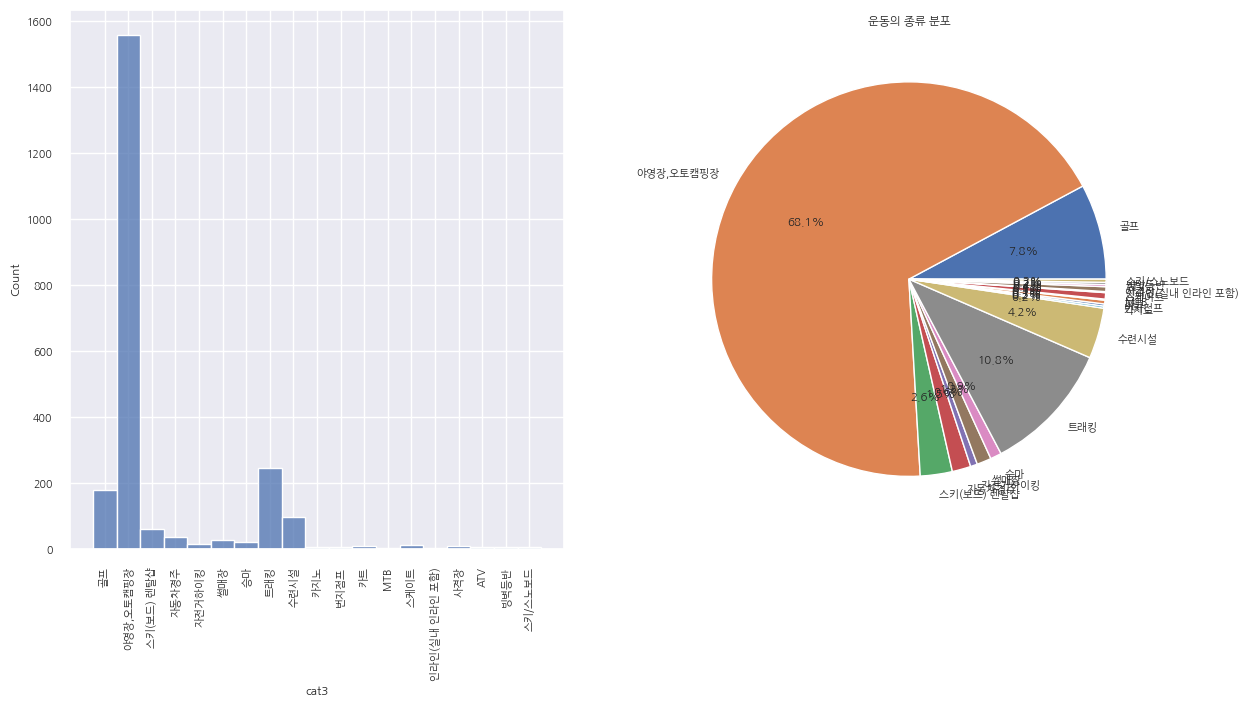

In [116]:
from collections import defaultdict
_, ax = plt.subplots(1,2,figsize=(14,7))
idx = df_train["cat2"] == "육상 레포츠"
sns.histplot(df_train[idx]["cat3"], ax=ax[0])
ax[0].tick_params(axis='x', rotation=90)

cat3_set = set(df_train[idx]["cat3"])
cat3_count = defaultdict(int)

for d in df_train[idx]["cat3"]:
    if d in cat3_set:
        cat3_count[d] += 1

_ = ax[1].pie(cat3_count.values(), labels=cat3_count.keys(), autopct="%1.1f%%")
plt.title("운동의 종류 분포")

Text(0.5, 1.0, '자연관광지의 종류 분포')

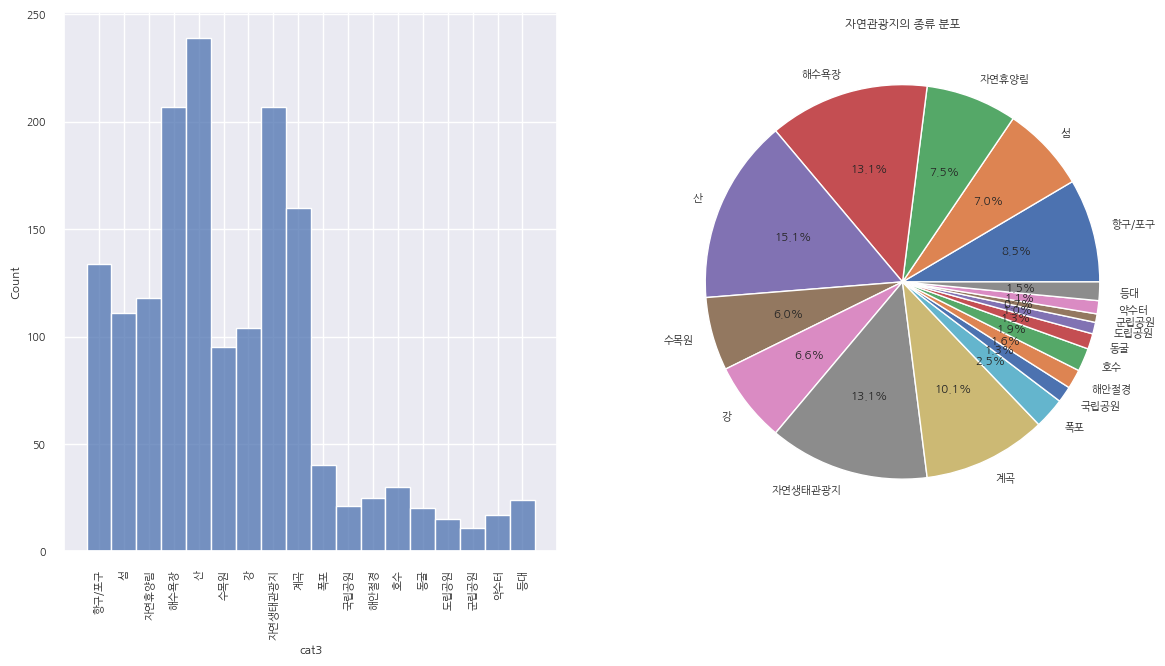

In [117]:
from collections import defaultdict
_, ax = plt.subplots(1,2,figsize=(14,7))
idx = df_train["cat2"] == "자연관광지"
sns.histplot(df_train[idx]["cat3"], ax=ax[0])
ax[0].tick_params(axis='x', rotation=90)

cat3_set = set(df_train[idx]["cat3"])
cat3_count = defaultdict(int)

for d in df_train[idx]["cat3"]:
    if d in cat3_set:
        cat3_count[d] += 1

_ = ax[1].pie(cat3_count.values(), labels=cat3_count.keys(), autopct="%1.1f%%")
plt.title("자연관광지의 종류 분포")

# Text 데이터 EDA
-----------
*   텍스트 데이터에 좀 많은 정보가 들어가 있으므로 단어에 대해서 분석을 해보자 한다.
*   MeCab을 이용하여 한국어를 인코딩 한다. 윈도우라면 다음 링크에서 설치하면 된다 ([link](https://wonhwa.tistory.com/49 "설치 방법"))
*   해당 EDA는 window환경에서 진행되어 다소 한국어 분석이 어렵다 (konlp 설치 불가능)

<AxesSubplot: xlabel='token'>

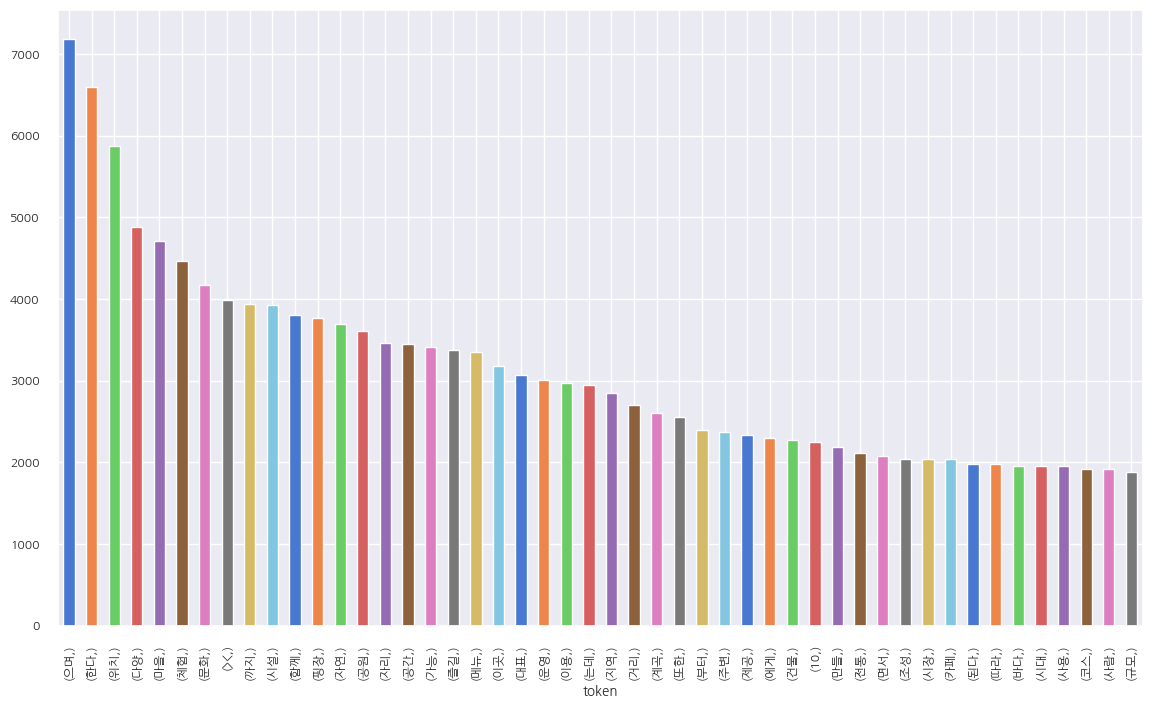

In [11]:
import MeCab
tokenizer = MeCab.Tagger()
texts = df_train['overview']
text_tokens = []
for text in texts:
    out = tokenizer.parse(text)

    out = out.split("\n")
    for o in out:
        if o == "EOS" or o == '':
            break
        word, wordclass = o.split('\t')
        if word in ['.', ',','br','<', '>']:
            continue
        if len(word) > 1:
            text_tokens.append(word)
df_token = pd.DataFrame({"token": text_tokens})

plt.figure(figsize=(14,8))
sns.set(font='NanumGothic', font_scale=0.8)
plt.tick_params(axis="x", rotation=90)
df_token.value_counts().head(50)[2:].plot.bar(color=colors)

#level_1q = df_token["token"].value_counts().quantile(0.25)
#level_3q = df_token["token"].value_counts().quantile(0.75)
#idx = level_1q < df_token["token"].value_counts() < level_3q
#df_token['token'].value_counts()[idx]

